In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

from src import item_analysis

import plotly.io as pio
pio.renderers.default='notebook'

%load_ext autoreload
%autoreload 2

## Accessing data

### Openmind
*om2/user/maedbh/item_analysis/data*

### Google Drive
https://drive.google.com/drive/folders/1ylVmbKlmIZg5KWwnMSwMVHY1tcJglqjT?usp=sharing

### Data Organization
    ├── data                                  <- Data folder (hosted on Google Drive and OpenMind)
    │   ├── Child-features-preprocessed.csv   <- All features (preprocessed) for Child questionnaires
    │   ├── Child-features-raw.csv            <- All features (raw) for Child questionnaires
    │   ├── Parent-features-preprocessed.csv  <- All features (preprocessed) for Parent questionnaires
    │   ├── Parent-features-raw.csv           <- All features (raw) for Parent questionnaires
    │   ├── Teacher-features-preprocessed.csv <- All features (preprocessed) for Teacher questionnaires
    │   ├── Teacher-features-raw.csv          <- All features (raw) for Teacher questionnaires
    │   ├── item-names-cleaned.csv            <- Dictionary linking questionnaire columns to question keys
    │   ├── participants.csv                  <- Participant identifiers (for entire dataset)


In [83]:
# load data

# set data dir (wherever data csv files are saved)
data_dir = '/Users/maedbhking/Documents/item_analysis/data' # set data dir

df_data, df_dict, df_diagnosis = item_analysis.load_data(
                                        data_dir=data_dir, 
                                        assessment='Parent', # Teacher, Child
                                        data_type='preprocessed'
                                        )


/Users/maedbhking/Documents/item_analysis/src/item_analysis.py:24: DtypeWarning:

Columns (137,152) have mixed types. Specify dtype option on import or set low_memory=False.



In [123]:
item_analysis.load_data?

## Assessment List

All behavioral questionnaires are detailed in this assessment list: https://docs.google.com/spreadsheets/d/1sGb3ECGR47BzIWNZwzh4ARrjFaf5ByVA/edit?usp=sharing&ouid=110847987931723045299&rtpof=true&sd=true

For each assessment (Child, Parent, Teacher) there are multiple domains and within each domain there are multiple measures. Each measure is given an abbreviation (e.g., Temporal Discounting Task is abbreviated as *TempDisc*)


# Inspecting data dictionary

The data dictionary contains all of the questions (6119) that are administered to every participant in the healthy brain network dataset (incl. Child, Parent, and Teacher Measures)

Structure of dictionary:
* **questions**: the exact question that is asked 
* **keys**: unique identifier for each question
* **datadic**: abbreviated name of each measure, should correspond to **Abbreviation(s) LORIS** in Assessment Link (although there are some differences): https://docs.google.com/spreadsheets/d/1sGb3ECGR47BzIWNZwzh4ARrjFaf5ByVA/edit?usp=sharing&ouid=110847987931723045299&rtpof=true&sd=true
* **col_name**: the column name linking each question to the data (data are in **df_data** dataframe)
* **assessment**: assessment(e.g., Parent Measures, Child Measures, Teacher Measures)
* **domains**: domain (e.g., Demographic_Questionnaire_Measures)
* **measures**: measures (e.g., Child Mind Institute Symptom Checker)

In [84]:
# data dictionary

df_dict.tail(5)

,questions,keys,datadic,col_name,assessment,domains,measures
6114,"g. Hallucinogens (psychedelics, LSD, mescaline...",CSC_55gP,SympChck,"SympChck,CSC_55gP",Parent Measures,Demographic_Questionnaire_Measures,Child Mind Institute Symptom Checker
6115,"h. Solvents/Inhalants (glue, gasoline, chlorof...",CSC_55hC,SympChck,"SympChck,CSC_55hC",Parent Measures,Demographic_Questionnaire_Measures,Child Mind Institute Symptom Checker
6116,"h. Solvents/Inhalants (glue, gasoline, chlorof...",CSC_55hP,SympChck,"SympChck,CSC_55hP",Parent Measures,Demographic_Questionnaire_Measures,Child Mind Institute Symptom Checker
6117,"i. Other (prescription drugs, nitrous oxide, e...",CSC_55iC,SympChck,"SympChck,CSC_55iC",Parent Measures,Demographic_Questionnaire_Measures,Child Mind Institute Symptom Checker
6118,"i. Other (prescription drugs, nitrous oxide, e...",CSC_55iP,SympChck,"SympChck,CSC_55iP",Parent Measures,Demographic_Questionnaire_Measures,Child Mind Institute Symptom Checker


In [85]:
df_dict.shape

(1725, 7)

## Inspecting data

* Columns: all data columns for a particular assessment (example given here is Parent Measures) + demographics (sex, age, race, ethnicity) + clinical diagnoses (diagnosis, comorbidities)
* Rows: all possible participants, each participant has a unique identifier

In [86]:
df_data.head(10)

,Identifiers,Sex,Age,Diagnosis,comorbidities,Race,Ethnicity,"PreInt_EduHx,CPSE","PreInt_EduHx,EI","PreInt_EduHx,IEP",...,"WHODAS_P,WHODAS_P_Days01","WHODAS_P,WHODAS_P_Days02","WHODAS_P,WHODAS_P_Days03","WHODAS_P,WHODAS_P_Total","DailyMeds,alcohol","DailyMeds,caffiene","DailyMeds,drugs","DailyMeds,hours_sleep","DailyMeds,medications","DailyMeds,nicotine"
0,NDARAA075AMK,-1.323148,-1.035197,-0.724913,-0.888546,-1.734135,-1.866216,-0.613334,-0.545866,-1.077767,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,2.125544e+00,-1.319479e+00,2.111489e+00,-2.271922,7.876414e+00,2.125544e+00
1,NDARAA112DMH,0.755773,-1.372556,-0.635508,-0.269201,-1.213304,-0.570331,-0.613334,-0.545866,-1.077767,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,2.125544e+00,-1.319479e+00,2.111489e+00,4.546433,-1.580221e+00,2.125544e+00
2,NDARAA117NEJ,0.755773,-0.821792,-0.635508,-0.269201,-1.213304,-0.570331,-0.613334,-0.545866,-1.077767,...,-0.532893,-3.365649e-01,-0.373375,6.593918e-01,2.125544e+00,-1.319479e+00,2.111489e+00,-0.412371,7.876414e+00,2.125544e+00
3,NDARAA306NT2,-1.323148,3.099052,-0.546104,3.446868,-1.734135,0.725554,-0.613334,-0.545866,0.966150,...,1.031089,4.266465e+00,4.305747,2.389542e+00,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
4,NDARAA358BPN,0.755773,0.427258,-0.456699,-0.888546,-1.734135,-1.866216,-0.613334,-0.545866,0.966150,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
5,NDARAA504CRN,-1.323148,-0.339743,-0.367295,1.588833,-0.692474,-0.570331,-0.613334,-0.545866,-1.077767,...,-0.532893,-3.365649e-01,-0.373375,-2.846010e-01,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
6,NDARAA536PTU,0.755773,0.468663,-0.367295,-0.888546,-1.213304,-0.570331,-0.613334,-0.545866,-1.077767,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
7,NDARAA773LUW,-1.323148,0.936781,-0.724913,-0.888546,-0.171644,0.725554,-0.613334,-0.545866,0.966150,...,-1.054221,-3.365649e-01,0.796405,-1.071513e+00,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
8,NDARAA940JHB,0.755773,0.633502,-0.635508,-0.888546,-0.692474,-0.570331,-0.613334,-0.545866,-1.077767,...,-0.949955,-3.365649e-01,-0.139419,-4.424366e-01,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
9,NDARAA947ZG5,0.755773,0.933623,-0.635508,0.969488,0.349187,0.725554,-0.613334,-0.545866,0.966150,...,-0.011566,-5.110389e-17,0.000000,1.131388e+00,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16


In [87]:
df_data.shape

(4767, 1759)

## Get information on clinical diagnosis 
* When data are preprocessed (as they are here), all columns are numeric - imputed and scaled (mean 0 and std 1). 
* To get categorical values for some of the numeric columns (e.g,. Sex, Diagnosis, Race, Ethnicity), merge identfiers with **df_diagnosis** - see below

In [88]:
# merge diagnosis categorical information with data

df_data_dx = df_diagnosis[['Identifiers', 'Age', 'Sex', 'Diagnosis', 'Race', 'Ethnicity']].merge(df_data, on=['Identifiers'])
df_data_dx.columns = df_data_dx.columns.str.replace('_x', '_raw').str.replace('_y', '')


df_data_dx.head(5)

,Identifiers,Age_raw,Sex_raw,Diagnosis_raw,Race_raw,Ethnicity_raw,Sex,Age,Diagnosis,comorbidities,...,"WHODAS_P,WHODAS_P_Days01","WHODAS_P,WHODAS_P_Days02","WHODAS_P,WHODAS_P_Days03","WHODAS_P,WHODAS_P_Total","DailyMeds,alcohol","DailyMeds,caffiene","DailyMeds,drugs","DailyMeds,hours_sleep","DailyMeds,medications","DailyMeds,nicotine"
0,NDARAA075AMK,6.728040,female,No Diagnosis Given,Unknown,Unknown,-1.323148,-1.035197,-0.724913,-0.888546,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,2.125544e+00,-1.319479e+00,2.111489e+00,-2.271922,7.876414e+00,2.125544e+00
1,NDARAA112DMH,5.545744,male,ADHD-Combined Type,Hispanic,Hispanic or Latino,0.755773,-1.372556,-0.635508,-0.269201,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,2.125544e+00,-1.319479e+00,2.111489e+00,4.546433,-1.580221e+00,2.125544e+00
2,NDARAA117NEJ,7.475929,male,ADHD-Combined Type,Hispanic,Hispanic or Latino,0.755773,-0.821792,-0.635508,-0.269201,...,-0.532893,-3.365649e-01,-0.373375,6.593918e-01,2.125544e+00,-1.319479e+00,2.111489e+00,-0.412371,7.876414e+00,2.125544e+00
3,NDARAA306NT2,21.216746,female,Generalized Anxiety Disorder,Unknown,White/Caucasian,-1.323148,3.099052,-0.546104,3.446868,...,1.031089,4.266465e+00,4.305747,2.389542e+00,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16
4,NDARAA358BPN,11.853296,male,No Diagnosis Given: Incomplete Eval,Unknown,Unknown,0.755773,0.427258,-0.456699,-0.888546,...,0.000000,-5.110389e-17,0.000000,-1.341494e-16,8.860923e-16,-2.984377e-16,-8.978377e-16,0.000000,2.624744e-16,8.860923e-16


## Doing item analysis on sentences within and across measures

One question that we have with this dataset is how similar sentences (within and between) measures are semantically similar to each other (i.e. are they arriving at similar constructs). Each measure was designed to measure specific constructs, however, it is not clear the extent to which there is overlap across the many measures that are administered to children in order to arrive at a diagnosis.

By applying machine learning tools (e.g., transformer models: https://www.sbert.net/), we can statistically assess the semantic similarity between sentences.

Then, knowing the similarity between questions, we can compare the similarity between responses to these questions. 

## Example

To start, take one measure "CBCL" (https://docs.google.com/spreadsheets/d/1sWNibCIiNhaQSMG3YEszyQvSl8qe7CT3/edit?usp=sharing&ouid=110847987931723045299&rtpof=true&sd=true) and determine the similarity across sentences within this questionnaire

In [89]:
# all possible measures to index
df_dict['datadic'].unique()

array(['APQ_P', 'ARI_P', 'ASSQ', 'Barratt', 'CBCL', 'CBCL_Pre', 'CIS_P',
       'DTS', 'ESWAN', 'FSQ', 'ICU_P', 'MFQ_P', 'NLES_P', 'PBQ', 'PCIAT',
       'PhenX_Neighborhood', 'PreInt_Demos_Home', 'PreInt_FamHx_RDC',
       'PreInt_Lang', 'PSI', 'RBS', 'SAS', 'SCARED_P', 'SCQ', 'SDQ',
       'SRS', 'SRS_Pre', 'SWAN', 'Vineland', 'WHODAS_P', 'SympChck'],
      dtype=object)

In [126]:
## Get Answers + Questions for example measure (CBCL)

# get CBCL questions
sentences = df_dict[df_dict['datadic']=='CBCL']['questions'].tolist()

# get answers to CBCL questions
cols_to_include = df_data.columns[df_data.columns.str.contains('CBCL,')]
df_A = df_data[cols_to_include]

print(df_A)

print(sentences)

      CBCL,CBCL_01  CBCL,CBCL_02  CBCL,CBCL_03  CBCL,CBCL_04  CBCL,CBCL_05  \
0        -0.998677 -1.287918e-01     -1.318523 -1.513130e+00     -0.553205   
1         0.000000 -2.412916e-17      0.000000 -3.342349e-16      0.000000   
2        -0.998677 -1.287918e-01      1.456829 -7.869706e-03      1.377283   
3         2.015954 -1.287918e-01      0.069153 -7.869706e-03      1.377283   
4         0.000000 -2.412916e-17      0.000000 -3.342349e-16      0.000000   
...            ...           ...           ...           ...           ...   
4762     -0.998677 -1.287918e-01      1.456829  1.497390e+00      3.307771   
4763      0.508639 -1.287918e-01      0.069153 -7.869706e-03     -0.553205   
4764     -0.998677 -1.287918e-01     -1.318523 -1.513130e+00     -0.553205   
4765     -0.998677  1.378072e+01      1.456829  1.497390e+00      3.307771   
4766      2.015954 -1.287918e-01      1.456829 -1.513130e+00      1.377283   

      CBCL,CBCL_06  CBCL,CBCL_07  CBCL,CBCL_08  CBCL,CBCL_09  C

## Calculate sentence similarity

Uses basic bert model to calculate sentence similarity across all sentence combinations

In [ ]:
# calculate sentence similarity
cosine_scores, pairs = item_analysis.sentence_similarity(sentences)

## Plot heatmap and dendrogram of cosine scores
(these are just two examples of ways to visualize the results output)

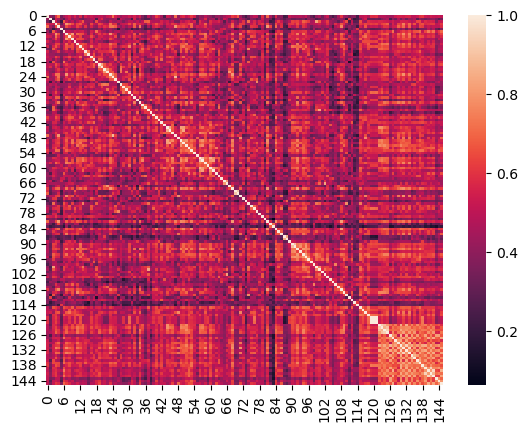

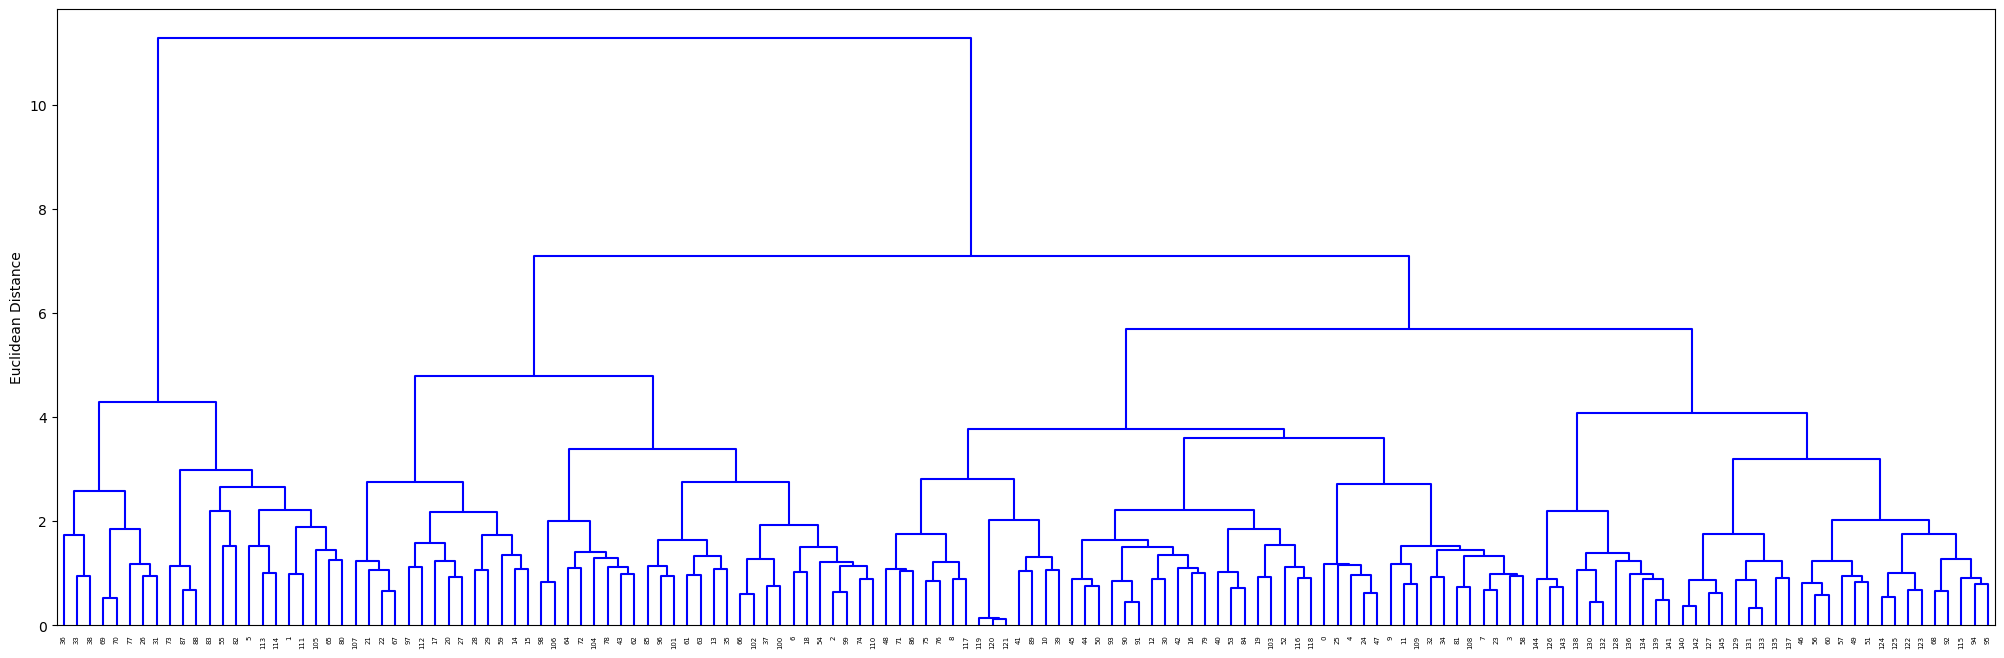

In [128]:
# plot heatmap
item_analysis.plot_heatmap(array=cosine_scores, labels=None);

# plot dendrogram
item_analysis.dendrogram_plot(dataframe=cosine_scores);

## Plot distribution of scores and sentence similarities

plot the distribution of scores for the sentence pairs (0-1 range) with 1 being most semantically similar and 0 being least semantically similar

then, plot the top 25% of most semantically similar sentences

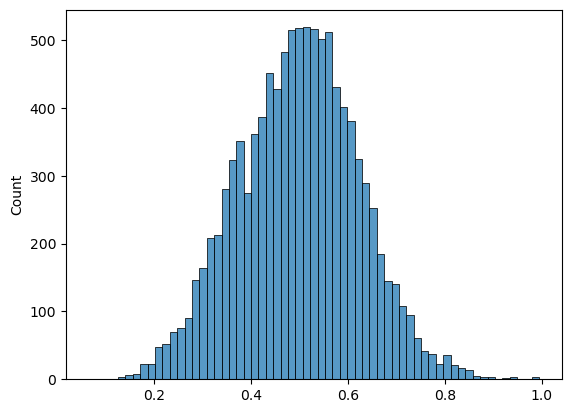

+--------------------------------------------+-------------------------------------+----------+
| CBCL                                       |                                     |          |
+============================================+=====================================+==========+
| Sentence 1                                 | Sentence 2                          | Question |
+--------------------------------------------+-------------------------------------+----------+
| 113A. Has other problem                    | 113B. Has other problem             | 0.99     |
+--------------------------------------------+-------------------------------------+----------+
| 113A. Has other problem                    | 113C. Has other problem             | 0.99     |
+--------------------------------------------+-------------------------------------+----------+
| 113B. Has other problem                    | 113C. Has other problem             | 0.99     |
+---------------------------------------

In [113]:

# plot distribution of scores
scores = [r['score'].tolist() for r in pairs]
sns.histplot(scores)
plt.show()

# plot table
item_analysis.plot_top_sentences(pairs, sentences, A_similarity=None, percent=25, title='CBCL')


## Compare answer similarity
Take two separate sets of answers (from two different questionnaires) and calculate correlation between them

In [131]:

# get answers to CBCL questions
cols_to_include = df_data.columns[df_data.columns.str.contains('CBCL,')]
x = df_data[cols_to_include]

# get answers to ESWAN questions
cols_to_include = df_data.columns[df_data.columns.str.contains('ESWAN,')]
y = df_data[cols_to_include]


## Calculate distance correlation between two questionnaires

In [122]:
import dcor 

dcor.distance_correlation(x, y)

0.5174836049971643

## The distance correlation t-test of independence

In [163]:
dcor.independence.distance_correlation_t_test(x, y)

HypothesisTest(pvalue=0.0, statistic=57.282815452320364)

As we can observe, this test correctly rejects the null hypothesis in the second case and not in the first case.

The test illustrated here is an asymptotic test, that relies in the approximation of the statistic distribution to the Student’s t-distribution under the null hypothesis, when the dimension of the data goes to infinity. This test is thus faster than permutation tests, as it does not require the use of permutations of the data, and it is also deterministic for a given dataset. However, the test should be applied only for high-dimensional data, at least in theory.

We will now plot for the case of normal distributions the histogram of the statistic, and compute the Type I error, as seen in Székely and Rizzo1. Users are encouraged to download this example and increase that number to obtain better estimates of the Type I error. In order to replicate the original results, one should set the value of n_tests to 1000.

## Permutation test of distance correlation

In [ ]:
item_analysis.distance_correlation_permutation(x,y)

## The distance covariance test of independence

In [102]:
random_state = np.random.default_rng(83110)
dcor.independence.distance_covariance_test(
    x,
    y,
    num_resamples=200,
    random_state=random_state,
)

HypothesisTest(pvalue=0.004975124378109453, statistic=213.46578868208118)

We can see that the p-value obtained is indeed very small, and thus we can safely reject the null hypothesis, and consider that there is indeed dependence between the random vectors.

The next test illustrated here is a permutation test, which compares the distance covariance of the original dataset with the one obtained after random permutations of one of the input arrays. Thus, increasing the number of permutations makes the p-value more accurate, but increases the computational cost. 

## Permutation test of distance covariance

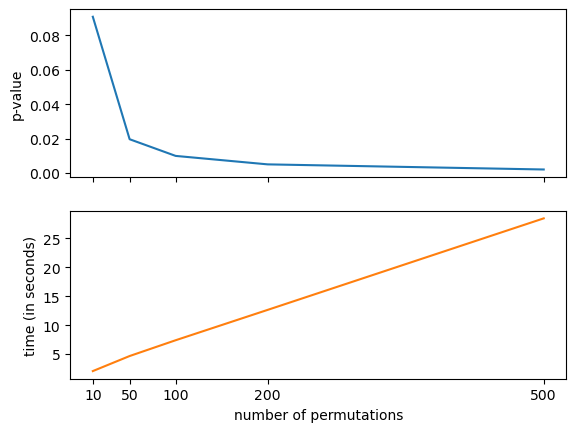

In [156]:
item_analysis.distance_covariance_permutation(x,y)

## Monte Carlo Test - get estimates of Type I error

We generate independent data following a multivariate Gaussian distribution as well as different 
t(v) distributions. In all cases we consider random vectors with dimension 5. We perform the tests for different number of observations, computing the number of permutations used as [200 + 5000/n]. We fix the significance level to 0.1.

In [ ]:
# monte carlo test
#item_analysis.monte_carlo_test(x,y)

## TO DO

- add preamble for more context
- tdif similarity - check this comparison with sentenceBert (do the results always form a bellcurve?)
- what kinds of constructs are being evaluated?
- Compare responses across two questionnaires (get correlation distance between two matrices `dcorr`) - number of rows must be the same, but the number of columns can be different
- hierarchical clustering on the cosine similarity matrix (of sentences) to determine whether there are clusters that fall out (look both at sentences and responses, are these clusters in alignment?)
- compare certain "clusters" across questionnaires - anxiety items on CBCL and GAD7 (or anxiety questionnaire). To what extent are they measuring the same construct?
- can we get a correlation across items per participant? rather than focus on the group level zoom in on the individual
- figure: compare parent vs. teacher vs. child predictions